In [141]:
import tensorflow as tf
import numpy as np
import cv2 # video image
import os # manage file
from tqdm import tqdm # monitor
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from os import listdir
from os.path import isfile, join


In [142]:
image_size = 224
num_classes = 3
trainpath = './lamiaceae/train/'
testpath = './lamiaceae/test/'
validpath = './lamiaceae/mini_valid/'

training = [trainpath+f for f in listdir(trainpath) if listdir(join(trainpath, f))]
testing = [testpath+f for f in listdir(testpath) if listdir(join(testpath, f))]
valid = [validpath+f for f in listdir(validpath) if listdir(join(validpath, f))]

In [248]:
classes = ['hairy_basi', 'sweet_basi', 'tail_basil']

The 10 classes are:

<ol start="0">
<li> hairy_basil
<li>  sweet_basil
<li> tail_basil
</ol>

In [143]:
def img2data(path):
  rawImgs = []
  labels = []

  for imagePath in (path):
    for item in tqdm(listdir(imagePath)):
      file = join(imagePath, item)
      if file[-3:] =='jpg':
        img = cv2.imread(file)
        img = cv2.resize(img ,(image_size,image_size))
        rawImgs.append(img_to_array(img))
      
        l = imagePath.split('/')[-1]
        
        if l == 'hairy_basil':
          labels.append(0)         
        elif l == 'sweet_basil':
          labels.append(1)
        elif l == 'thai_basil':
          labels.append(2)
          
          

  return rawImgs, labels

In [144]:
# x_train, y_train = img2data(training)
# x_valid, y_valid = img2data(valid)
# x_test, y_test = img2data(testing)

In [145]:
# np.save('./datasetVec/x_train.npy', x_train)
# np.save('./datasetVec/x_test.npy', x_test)
# np.save('./datasetVec/x_valid.npy', x_valid)
# np.save('./datasetVec/y_valid.npy', y_valid)
# np.save('./datasetVec/y_train.npy', y_train)
# np.save('./datasetVec/y_test.npy', y_test)

In [146]:
x_train = np.load('./datasetVec/x_train.npy', )
x_test = np.load('./datasetVec/x_test.npy', )
x_valid = np.load('./datasetVec/x_valid.npy', )
y_valid = np.load('./datasetVec/y_valid.npy', )
y_train = np.load('./datasetVec/y_train.npy', )
y_test = np.load('./datasetVec/y_test.npy', )

In [147]:
x_train = np.array(x_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
x_test = np.array(x_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)
x_valid = np.array(x_valid, dtype=np.float32)
y_valid = np.array(y_valid, dtype=np.float32)

# x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')
# x_vaid = x_vaid.astype('float32')
# feed in keras รับ input ไม่เกิน 1 เลยต้องหารลดขนาดตัวเลข
x_train /= 255
x_test /= 255
x_valid /= 255

In [148]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_valid.shape, y_valid.shape

((883, 224, 224, 3),
 (883,),
 (173, 224, 224, 3),
 (173,),
 (30, 224, 224, 3),
 (30,))

In [149]:
import matplotlib.pyplot as plt
print(y_train[1])
plt.subplot(1,2,1)
plt.imshow(x_test[1])

print(y_train[2])
plt.subplot(1,2,2)
plt.imshow(x_test[2])

0.0
0.0


In [150]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)


In [151]:
y_valid[1]

array([1., 0., 0.], dtype=float32)

In [152]:
y_train[1]

array([1., 0., 0.], dtype=float32)

# Function

In [226]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)

In [300]:
from sklearn import metrics

def plotCM(y_test, pred, size=5, display_labels=classes):
    confusion_matrix = metrics.confusion_matrix(y_test.argmax(1), pred.argmax(1))
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                    display_labels = display_labels,)
    fig, ax = plt.subplots(figsize=(size,size))
    cm_display.plot(ax=ax)
    plt.show()

In [268]:
from sklearn.metrics import classification_report

def report(y_true, y_pred, target_names = classes) :
    print(classification_report(y_true.argmax(axis=1), y_pred.argmax(axis=1), target_names=target_names))



Convolution layer -> feture dectector/ kernel

```python
Conv2D(filter, (kernel size), activation='relu', input_shape=(width, width, chanel))
```

Pooling ลดขนาดข้อมูล เพื่อให้ประมวลผลได้เร็ว

```keras.layers.MaxPool2D(pool_size=(x,x))```

Fully connected (สีเขียว, ฟ้า)

```keras.layers.Dense(16)```

ลดมิติข้อมูล

```keras.layers.Flatten()```

output layer

```keras.layers.Dense(#node in output layer, activation='softmax')```



In [72]:
# model = keras.Sequential([
#     keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(image_size, image_size, 3)),

#     keras.layers.Dropout(0.25),
#     keras.layers.Conv2D(10, (3,3), activation='relu'),
#     keras.layers.MaxPooling2D(pool_size=(2,2)),
    
#     keras.layers.Dropout(0.25),
#     keras.layers.Conv2D(10, (3,3), activation='relu'),
    
#     keras.layers.Dropout(0.25),
#     keras.layers.Conv2D(10, (3,3), activation='relu'),
#     keras.layers.MaxPooling2D(pool_size=(2,2)),

#     keras.layers.Flatten(),
#     keras.layers.Dropout(0.5),
#     keras.layers.Dense(128, activation='relu'),

#     keras.layers.Dropout(0.25),
#     keras.layers.Dense(num_classes, activation='softmax')
# ])
# model.summary()

# Create model

In [153]:
model = keras.Sequential([
    keras.layers.Conv2D(10, (3,3), padding='same', activation='relu', input_shape=(image_size, image_size, 3)),
    keras.layers.MaxPooling2D(pool_size=(3, 3)),

    # keras.layers.Conv2D(10, (3,3), padding="same", activation='relu'),
    keras.layers.Conv2D(10, (3,3), padding="same", activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    # keras.layers.Conv2D(10, (3,3), padding="same", activation='relu'),
    keras.layers.Conv2D(10, (3,3), padding="same", activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(num_classes, activation='softmax')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 224, 224, 10)      280       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 74, 74, 10)        910       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 37, 37, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 37, 37, 10)        910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 18, 18, 10)      

In [170]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=5,  # rotation
                                   width_shift_range=0.2,  # horizontal shift
                                   zoom_range=0.2,  # zoom
                                   horizontal_flip=True,  # horizontal flip
                                )
datagen.fit(x_train) 

In [171]:
for x in datagen.flow(x_train): break
x.shape
plt.imshow(x[0])

In [156]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics= ['accuracy'])


In [157]:
batch_size = 50
epochs = 30

In [158]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size) , steps_per_epoch=x_train.shape[0] // batch_size, epochs=epochs ,validation_data=(x_valid, y_vaid))

Epoch 1/30
17/17 [==============================] - 8s 397ms/step - loss: 1.1077 - accuracy: 0.3253 - val_loss: 1.1001 - val_accuracy: 0.3333
Epoch 2/30
17/17 [==============================] - 7s 388ms/step - loss: 1.0968 - accuracy: 0.3241 - val_loss: 1.0991 - val_accuracy: 0.2333
Epoch 3/30
17/17 [==============================] - 6s 349ms/step - loss: 1.0964 - accuracy: 0.3517 - val_loss: 1.0998 - val_accuracy: 0.2667
Epoch 4/30
17/17 [==============================] - 6s 349ms/step - loss: 1.0918 - accuracy: 0.3824 - val_loss: 1.1039 - val_accuracy: 0.3333
Epoch 5/30
17/17 [==============================] - 6s 348ms/step - loss: 1.0840 - accuracy: 0.3830 - val_loss: 1.1161 - val_accuracy: 0.3000
Epoch 6/30
17/17 [==============================] - 6s 359ms/step - loss: 1.0744 - accuracy: 0.4165 - val_loss: 1.1258 - val_accuracy: 0.2333
Epoch 7/30
17/17 [==============================] - 6s 350ms/step - loss: 1.0678 - accuracy: 0.3974 - val_loss: 1.1676 - val_accuracy: 0.3000
Epoch 

In [168]:
model.evaluate(x_test, y_test)

6/6 [==============================] - 0s 34ms/step - loss: 0.7068 - accuracy: 0.7341


[0.706794261932373, 0.7341040372848511]

In [172]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title('accuracy');plt.ylabel('accuracy');plt.xlabel('epoch')
plt.plot(history.history['accuracy']);plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'validation'], loc='upper left')
# plt.show()

plt.subplot(122)
plt.title('loss');plt.ylabel('loss')
plt.xlabel('epoch')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validation'], loc='upper left')
# plt.show()

In [173]:
y_pred = model.predict(x_test)

6/6 [==============================] - 0s 55ms/step


In [182]:
from sklearn.metrics import classification_report
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1), target_names=['hairy_basi', 'sweet_basi', 'tail_basil']))

              precision    recall  f1-score   support

  hairy_basi       0.80      0.70      0.74        56
  sweet_basi       0.77      0.80      0.78        59
  tail_basil       0.65      0.71      0.68        58

    accuracy                           0.73       173
   macro avg       0.74      0.73      0.73       173
weighted avg       0.74      0.73      0.73       173



In [177]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test.argmax(1), y_pred.argmax(1))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                display_labels = ['hairy_basi', 'sweet_basi', 'tail_basil'])

cm_display.plot()
plt.show()

# Transfer learning

In [208]:
from tensorflow import keras
from keras.applications.vgg16 import VGG16, preprocess_input

In [212]:
base = VGG16(include_top=False, weights='imagenet', input_shape=x_train.shape[1:])

In [213]:
base.trainable = False
base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [216]:
top_model = base.output
top_model = Flatten()(top_model)
top_model = Dense(1024, activation='relu')(top_model)
top_model = Dropout(0.2)(top_model)
top_model = Dense(256, activation='relu')(top_model)
top_model = Dropout(0.2)(top_model)
top_model = Dense(num_classes, activation='softmax')(top_model)

In [220]:
from keras.models import Model
model = Model(inputs=base.input, outputs=top_model)

In [222]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [221]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [225]:
history_transfer = model.fit(x_train, y_train, batch_size=20, epochs=30, validation_data=(x_valid, y_vaid))

Epoch 1/30
45/45 [==============================] - 20s 354ms/step - loss: 2.3339 - accuracy: 0.4564 - val_loss: 1.7414 - val_accuracy: 0.3667
Epoch 2/30
45/45 [==============================] - 11s 244ms/step - loss: 0.7743 - accuracy: 0.6648 - val_loss: 1.7081 - val_accuracy: 0.4333
Epoch 3/30
45/45 [==============================] - 11s 249ms/step - loss: 0.4968 - accuracy: 0.8029 - val_loss: 2.0145 - val_accuracy: 0.5000
Epoch 4/30
45/45 [==============================] - 11s 256ms/step - loss: 0.2865 - accuracy: 0.8947 - val_loss: 1.9754 - val_accuracy: 0.5000
Epoch 5/30
45/45 [==============================] - 11s 254ms/step - loss: 0.2921 - accuracy: 0.8879 - val_loss: 2.7918 - val_accuracy: 0.4667
Epoch 6/30
45/45 [==============================] - 11s 256ms/step - loss: 0.2269 - accuracy: 0.9128 - val_loss: 2.2935 - val_accuracy: 0.5000
Epoch 7/30
45/45 [==============================] - 12s 263ms/step - loss: 0.1585 - accuracy: 0.9411 - val_loss: 2.3182 - val_accuracy: 0.4000

In [272]:
# model.save('./transfer_model')
model2 = tf.keras.models.load_model('./transfer_model')

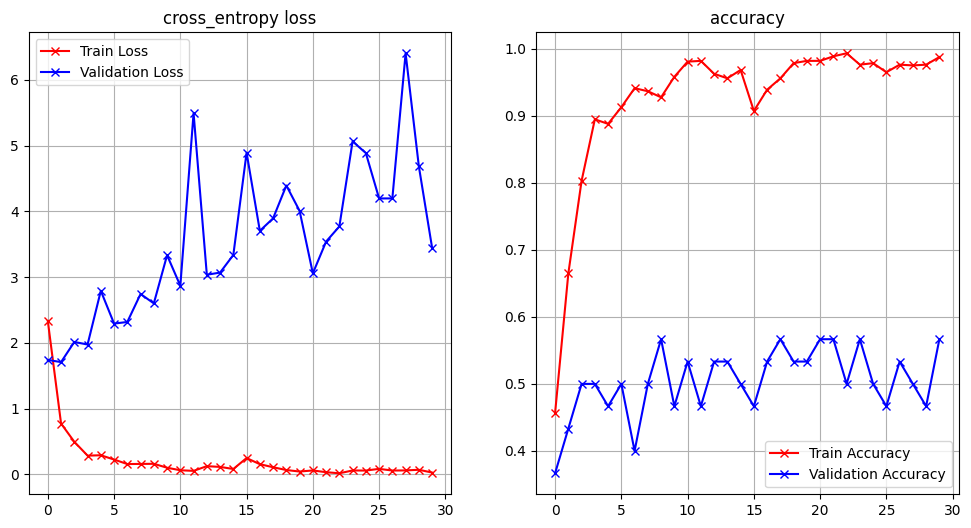

In [227]:
plot_loss_accuracy(history_transfer)

In [284]:
y_pred = model.predict(x_test)

6/6 [==============================] - 2s 306ms/step


In [285]:
report(y_test, y_pred)

              precision    recall  f1-score   support

  hairy_basi       0.85      0.95      0.90        56
  sweet_basi       0.89      0.97      0.93        59
  tail_basil       0.96      0.78      0.86        58

    accuracy                           0.90       173
   macro avg       0.90      0.90      0.89       173
weighted avg       0.90      0.90      0.89       173



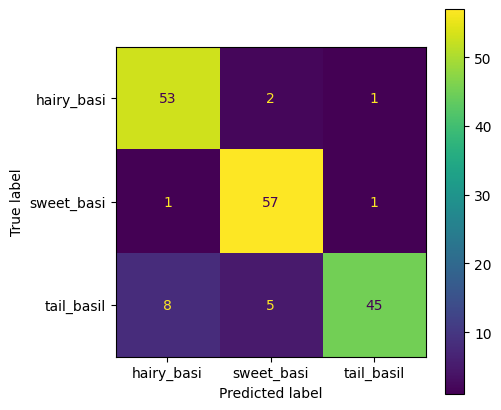

In [301]:
plotCM(y_test, y_pred)

1/1 [==============================] - 1s 1s/step
[[6.01660247e-07 8.97687018e-01 1.02312334e-01]]
real:hairy_basil
predict:sweet_basil


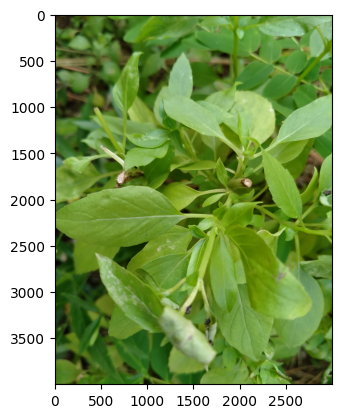

1/1 [==============================] - 0s 21ms/step
[[1.9526205e-04 6.3367528e-03 9.9346799e-01]]
real:hairy_basil
predict:thai_basil


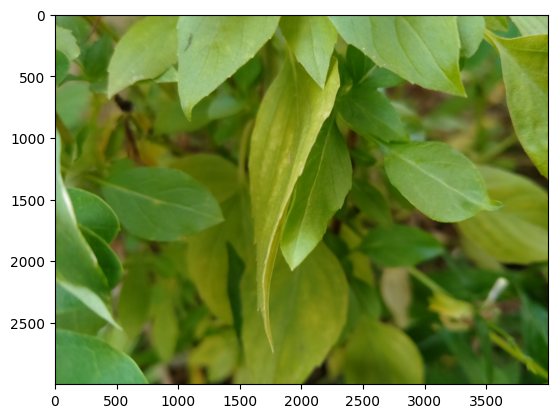

1/1 [==============================] - 0s 21ms/step
[[2.3214653e-04 1.8459329e-01 8.1517458e-01]]
real:hairy_basil
predict:thai_basil


1/1 [==============================] - 0s 25ms/step
[[0.05088288 0.9225503  0.02656686]]
real:hairy_basil
predict:sweet_basil


1/1 [==============================] - 0s 23ms/step
[[0.16698527 0.23349865 0.5995161 ]]
real:hairy_basil
predict:thai_basil


1/1 [==============================] - 0s 22ms/step
[[1.2474191e-04 2.5812452e-07 9.9987495e-01]]
real:hairy_basil
predict:thai_basil


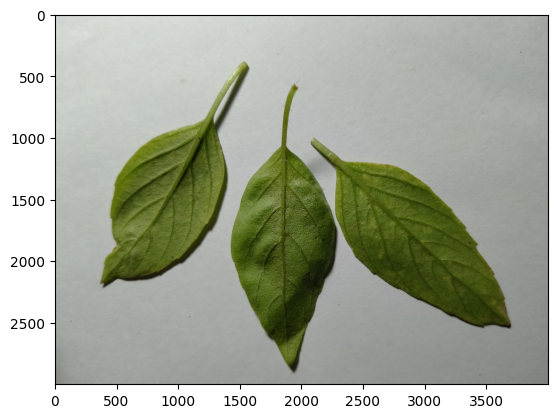

1/1 [==============================] - 0s 20ms/step
[[0.43063968 0.40800965 0.16135065]]
real:hairy_basil
predict:hairy_basil


1/1 [==============================] - 0s 22ms/step
[[1.2186010e-02 1.0782854e-05 9.8780328e-01]]
real:hairy_basil
predict:thai_basil


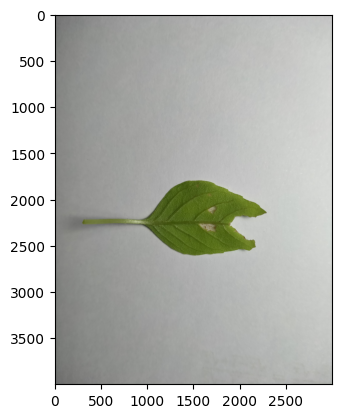

1/1 [==============================] - 0s 21ms/step
[[3.8375176e-05 1.4401537e-07 9.9996150e-01]]
real:hairy_basil
predict:thai_basil


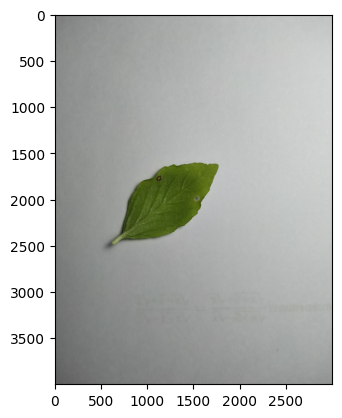

1/1 [==============================] - 0s 22ms/step
[[8.649148e-08 3.526781e-11 9.999999e-01]]
real:hairy_basil
predict:thai_basil


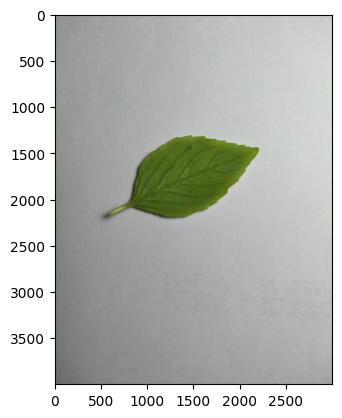

1/1 [==============================] - 0s 22ms/step
[[0.28191057 0.625704   0.09238546]]
real:sweet_basil
predict:sweet_basil


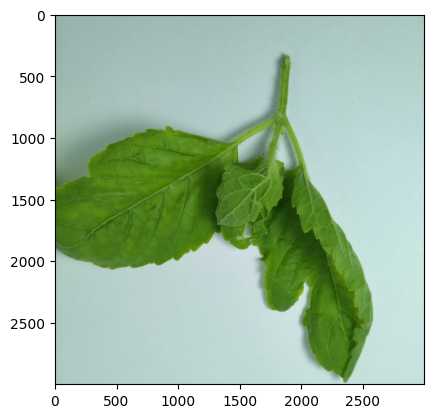

1/1 [==============================] - 0s 22ms/step
[[7.449743e-07 9.999987e-01 5.727364e-07]]
real:sweet_basil
predict:sweet_basil


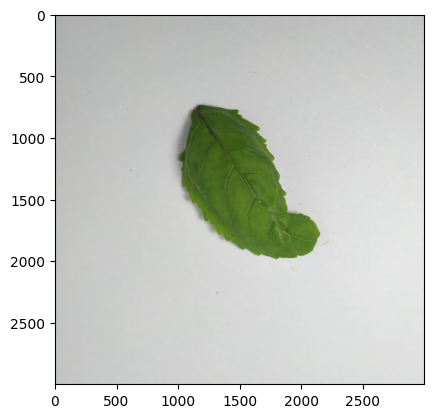

1/1 [==============================] - 0s 20ms/step
[[6.1687439e-05 9.9990809e-01 3.0106949e-05]]
real:sweet_basil
predict:sweet_basil


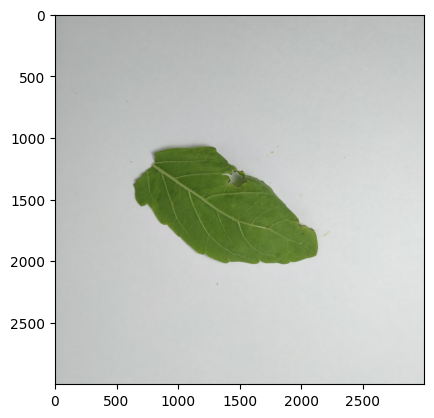

1/1 [==============================] - 0s 25ms/step
[[4.4020221e-10 1.0000000e+00 3.6465445e-10]]
real:sweet_basil
predict:sweet_basil


1/1 [==============================] - 0s 23ms/step
[[8.6084656e-02 9.1391319e-01 2.2314823e-06]]
real:sweet_basil
predict:sweet_basil


1/1 [==============================] - 0s 21ms/step
[[2.5024396e-09 1.0000000e+00 3.1464255e-11]]
real:sweet_basil
predict:sweet_basil


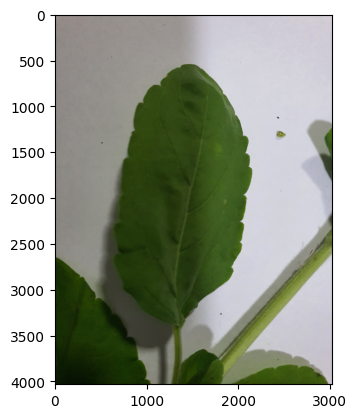

1/1 [==============================] - 0s 22ms/step
[[4.4451636e-04 9.9516833e-01 4.3871352e-03]]
real:sweet_basil
predict:sweet_basil


1/1 [==============================] - 0s 22ms/step
[[1.0839930e-04 9.9989057e-01 1.0535588e-06]]
real:sweet_basil
predict:sweet_basil


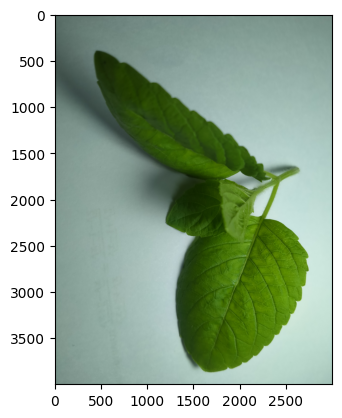

1/1 [==============================] - 0s 21ms/step
[[4.0858026e-04 4.5363337e-04 9.9913776e-01]]
real:sweet_basil
predict:thai_basil


1/1 [==============================] - 0s 21ms/step
[[0.3558518 0.5686605 0.0754877]]
real:sweet_basil
predict:sweet_basil


1/1 [==============================] - 0s 23ms/step
[[1.6640257e-02 2.7092584e-04 9.8308879e-01]]
real:thai_basil
predict:thai_basil


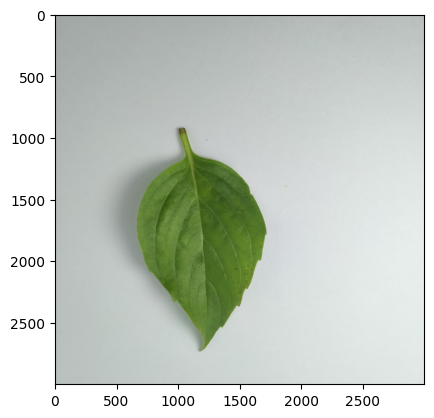

1/1 [==============================] - 0s 21ms/step
[[4.1769927e-06 7.4627131e-09 9.9999583e-01]]
real:thai_basil
predict:thai_basil


1/1 [==============================] - 0s 22ms/step
[[9.9784732e-01 9.9728920e-04 1.1553719e-03]]
real:thai_basil
predict:hairy_basil


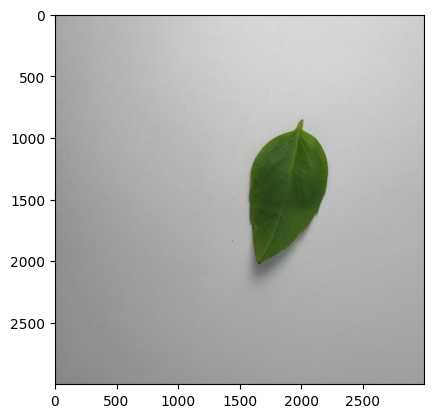

1/1 [==============================] - 0s 20ms/step
[[1.0024809e-07 7.2356565e-11 9.9999988e-01]]
real:thai_basil
predict:thai_basil


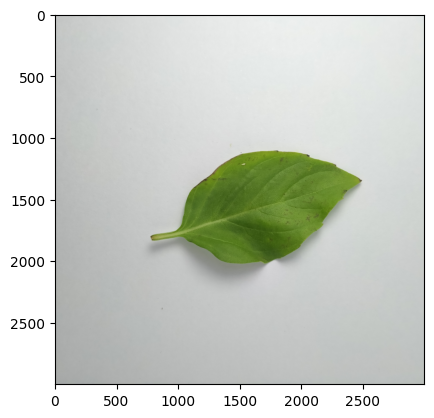

1/1 [==============================] - 0s 25ms/step
[[2.3677245e-02 1.5170277e-05 9.7630763e-01]]
real:thai_basil
predict:thai_basil


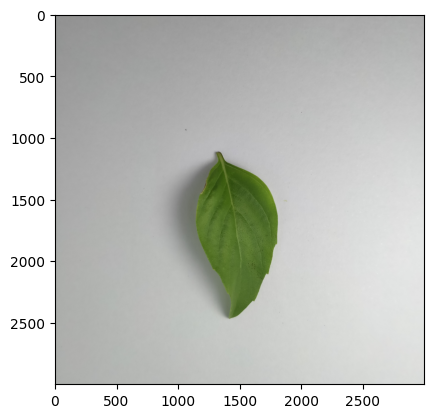

1/1 [==============================] - 0s 22ms/step
[[2.2724266e-04 6.5576707e-05 9.9970716e-01]]
real:thai_basil
predict:thai_basil


1/1 [==============================] - 0s 18ms/step
[[1.08352125e-01 1.76770955e-05 8.91630173e-01]]
real:thai_basil
predict:thai_basil


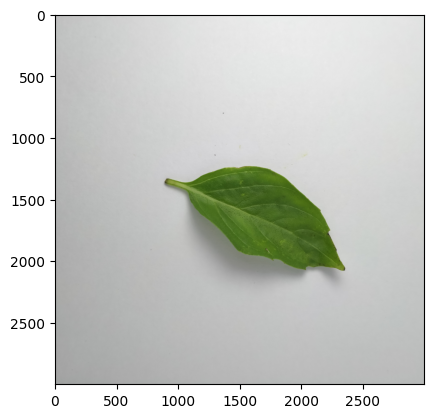

1/1 [==============================] - 0s 20ms/step
[[0.5488817  0.43150982 0.01960848]]
real:thai_basil
predict:hairy_basil


1/1 [==============================] - 0s 21ms/step
[[2.0344894e-06 6.5861945e-03 9.9341172e-01]]
real:thai_basil
predict:thai_basil


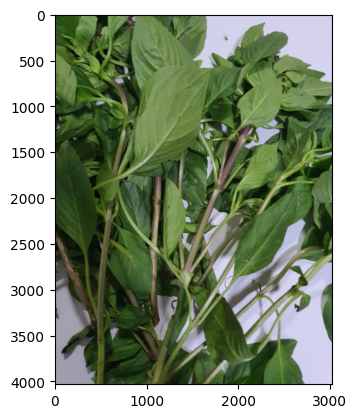

1/1 [==============================] - 0s 21ms/step
[[0.68101317 0.3180578  0.00092899]]
real:thai_basil
predict:hairy_basil


In [277]:
testpath = './lamiaceae/mini_valid/'
testImg = [testpath+f for f in listdir(testpath) if listdir(join(testpath,f))]
rimg = []
for imagePath in (testImg):
    for item in (os.listdir(imagePath)):
        file = os.path.join(imagePath,item)
        if item.split('.')[0] != "" and item.split('.')[-1] =='jpg':
            img = cv2.imread(file , cv2.COLOR_BGR2RGB)
            ori = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img ,(image_size,image_size))
            rimg = np.array(img)
            rimg = rimg.astype('float32')
            rimg /= 255
            rimg = np.reshape(rimg ,(1,image_size,image_size,3))
            predict = model.predict(rimg)
            label = ['hairy_basil','sweet_basil','thai_basil']
            result = label[np.argmax(predict)]
            print(predict)
            print('real:'+str(imagePath.split('/')[-1]))
            print('predict:'+str(result))
            plt.imshow(ori)
            plt.show()